In [1]:
from __future__ import print_function

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [3]:
def centroid_histogram(clt):    
# grab the number of different clusters and create a histogram
# based on the number of pixels assigned to each cluster    
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels) 
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum() 
    # return the histogram
    return hist

In [4]:
def plot_colors(hist, centroids):
# initialize the bar chart representing the relative frequency
# of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
# loop over the percentage of each cluster and the color of
# each cluster
    for (percent, color) in zip(hist, centroids):
# plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
        color.astype("uint8").tolist(), -1)
        startX = endX
# return the bar chart
    return bar

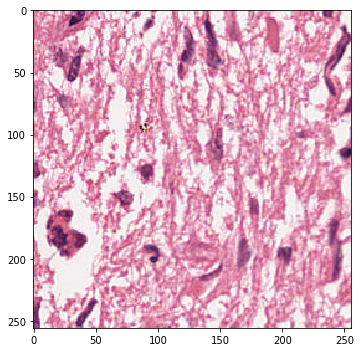

In [34]:
image = io.imread('/media/raj/Raj1_5/10ktiles/train/gbm/TCGA-02-0001-01Z-00-DX2_20x_13536_6944_256x256.png')
io.imshow(image)
io.show()

In [35]:
rows=image.shape[0]
cols=image.shape[1]
image=image.reshape(image.shape[0]*image.shape[1],3)

In [36]:
# kmeans = KMeans(n_clusters = 128, n_init=10, max_iter=200)
kmeans = KMeans(n_clusters = 3, n_init=10, max_iter=200)
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
kmeans.cluster_centers_

array([[223.69238549, 149.08806531, 179.28760295],
       [244.14554795, 225.05872509, 227.86398661],
       [177.38458374,  89.96865745, 136.71758802]])

In [38]:
numLabels = np.arange(0, len(np.unique(kmeans.labels_)) + 1)

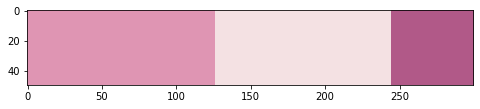

In [39]:
hist = centroid_histogram(kmeans)
bar = plot_colors(hist, kmeans.cluster_centers_)
 
# show our color bart
plt.figure()
plt.imshow(bar)
plt.show()

In [31]:
kmeans.cluster_centers_

array([[216.51193412, 134.95609394, 168.47679012],
       [176.54350864,  89.99749908, 133.23611622],
       [237.42330383, 205.19646018, 218.10511308]])

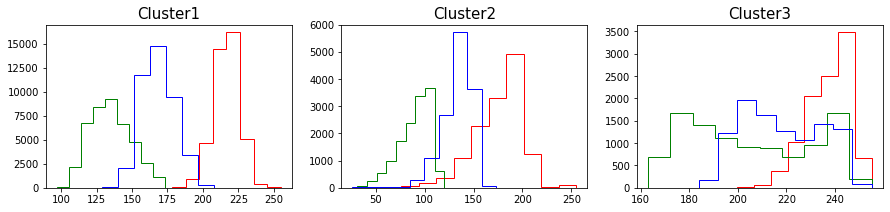

In [32]:
#kmeans - Clustered image
cluster1=image[kmeans.labels_==0, :]
cluster2=image[kmeans.labels_==1, :]
cluster3=image[kmeans.labels_==2, :]

fig, ax = plt.subplots(ncols=3, figsize=(15,3))

ax[0].hist(cluster1[:,0], histtype="step", color='r')
ax[0].hist(cluster1[:,1], histtype="step", color='g')
ax[0].hist(cluster1[:,2], histtype="step", color='b')
ax[0].set_title("Cluster1", fontsize=15)

ax[1].hist(cluster2[:,0], histtype="step", color='r')
ax[1].hist(cluster2[:,1], histtype="step", color='g')
ax[1].hist(cluster2[:,2], histtype="step", color='b')
ax[1].set_title("Cluster2", fontsize=15)

ax[2].hist(cluster3[:,0], histtype="step", color='r')
ax[2].hist(cluster3[:,1], histtype="step", color='g')
ax[2].hist(cluster3[:,2], histtype="step", color='b')
ax[2].set_title("Cluster3", fontsize=15)
plt.show()

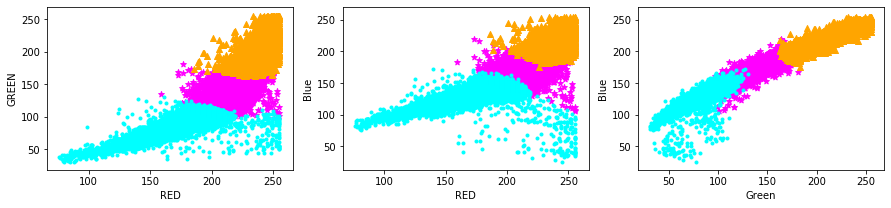

In [33]:
#HeatMap for each cluster
fig, ax = plt.subplots(ncols=3, figsize=(15,3))

ax[0].scatter(cluster1[:,0], cluster1[:,1], color='magenta', marker="*")
ax[0].scatter(cluster2[:,0], cluster2[:,1], color='cyan', marker=".")
ax[0].scatter(cluster3[:,0], cluster3[:,1], color='orange', marker="^")
ax[0].set_xlabel("RED")
ax[0].set_ylabel("GREEN")

ax[1].scatter(cluster1[:,0], cluster1[:,2], color='magenta', marker="*")
ax[1].scatter(cluster2[:,0], cluster2[:,2], color='cyan', marker=".")
ax[1].scatter(cluster3[:,0], cluster3[:,2], color='orange', marker="^")
ax[1].set_xlabel("RED")
ax[1].set_ylabel("Blue")

ax[2].scatter(cluster1[:,1], cluster1[:,2], color='magenta', marker="*")
ax[2].scatter(cluster2[:,1], cluster2[:,2], color='cyan', marker=".")
ax[2].scatter(cluster3[:,1], cluster3[:,2], color='orange', marker="^")
ax[2].set_xlabel("Green")
ax[2].set_ylabel("Blue")
plt.show()